In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
root = '/kaggle/input/fifa-20-complete-player-dataset/'
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-20-complete-player-dataset/players_15.csv
/kaggle/input/fifa-20-complete-player-dataset/players_16.csv
/kaggle/input/fifa-20-complete-player-dataset/players_17.csv
/kaggle/input/fifa-20-complete-player-dataset/players_18.csv
/kaggle/input/fifa-20-complete-player-dataset/players_19.csv
/kaggle/input/fifa-20-complete-player-dataset/teams_and_leagues.csv
/kaggle/input/fifa-20-complete-player-dataset/players_20.csv


In [2]:
df = pd.read_csv(
    os.path.join(root, 'players_20.csv'))
df.isnull().any()[df.isnull().any()>0]
df = df.fillna(df.mean)
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [3]:
df.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

***Analysis by Nation***

In [4]:
#Top 5 country with most per capital income
#Conisdering ony countries where players count is more than 100
nation = df.groupby('nationality')['wage_eur'].agg(['mean', 'count'])
nation = nation[nation['count'] > 100]
nation = nation.sort_values(by = 'mean', ascending = False)
nation[0:10]

,mean,count
nationality,,
Croatia,19619.047619,126
Belgium,16973.880597,268
Brazil,16646.844660,824
Spain,15728.502415,1035
Senegal,14874.015748,127
Uruguay,14597.560976,164
France,14026.422764,984
Ivory Coast,13847.619048,105
Portugal,13622.093023,344


In [5]:
#Top 20 country with most potential
#Conisdering ony countries where players count is more than 100
nation = df.groupby('nationality')['potential'].agg(['mean', 'count'])
nation = nation[nation['count'] > 100]
nation = nation.sort_values(by = 'mean', ascending = False)

fig = px.bar(nation[0:20], x= nation.index[0:20], y='mean')
fig.update_layout(title_text='Mean wages')
fig.update_xaxes(title_text="<b> Countries </b>")
fig.show()

In [6]:
#Top 5 country with most overall
#Conisdering ony countries where players count is more than 100
nation = df.groupby('nationality')['overall'].agg(['mean', 'count'])
nation = nation[nation['count'] > 100]
nation = nation.sort_values(by = 'mean', ascending = False)
nation[0:10]

,mean,count
nationality,,
Uruguay,71.646341,164
Brazil,71.161408,824
Portugal,70.514535,344
Czech Republic,70.313725,102
Spain,69.953623,1035
Croatia,69.785714,126
Serbia,69.489209,139
Argentina,69.118510,886
Ivory Coast,69.000000,105


***Position Analysis***

In [7]:
#Top 5 positions to earm money
#Conisdering ony positions where count is more than 100

position = df.groupby('player_positions')['wage_eur'].agg(['mean', 'count'])
position = position[position['count'] > 100]
position = position.sort_values(by = 'mean', ascending = False)

fig = px.bar(position[0:20], x= position.index[0:20], y='mean')
fig.update_layout(title_text='Best position to earn money')
fig.update_xaxes(title_text="<b> Positions </b>")
fig.show()

In [8]:
#Popular positions
#Couting products at various sectors
pos_dict = {'RW':0,'CF':0, 'ST':0, 'LW':0, 'RB':0, 'CB':0, 'CDM':0, 'CAM':0, 'LM':0,  'CB':0, 'CM':0, 'LB':0,  
           'RM':0, 'RWB':0, 'LWB':0}
for pos in pos_dict.keys():
    val = df['player_positions'].str.contains(pos).sum()
    pos_dict.update({pos:val})
fig = px.pie(values= pos_dict.values(), names= pos_dict.keys(), title='Position distribution')
fig.show()

***Players Ability Analysis***

<AxesSubplot:>

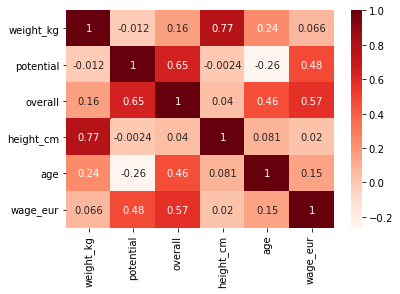

In [9]:
#Are there any correlation between physique and potential to EUR?
newdf =df[['weight_kg', 'potential', 'overall',  'height_cm', 'age', 'wage_eur',]]
correlation = newdf.corr()
sns.heatmap(correlation, cmap="Reds", annot = True) 

<AxesSubplot:>

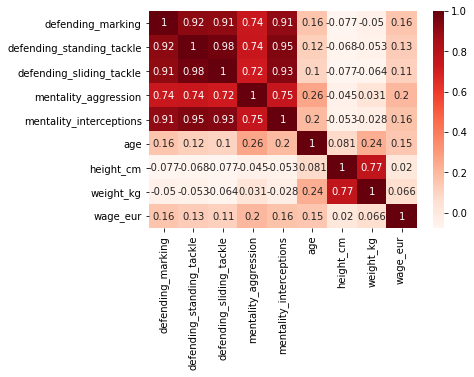

In [10]:
#Who can be a good defender?
defender = df[['defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'mentality_aggression', 'mentality_interceptions'
                       ,'age', 'height_cm', 'weight_kg', 'body_type', 'body_type', 'wage_eur']]
corrdf = defender.corr()
sns.heatmap(corrdf , cmap="Reds", annot = True) 

<AxesSubplot:>

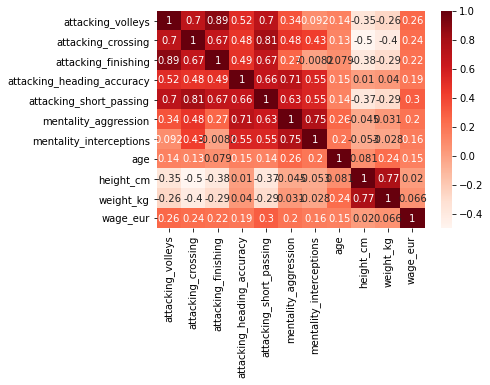

In [11]:
#Who can attack well?
defender = df[['attacking_volleys','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy','attacking_short_passing',  'mentality_aggression', 'mentality_interceptions'
                       ,'age', 'height_cm', 'weight_kg', 'body_type', 'body_type', 'wage_eur']]
corrdf = defender.corr()
sns.heatmap(corrdf , cmap="Reds", annot = True) 

In [12]:
#Can attack get players more money?
fig = px.scatter(df, x="attacking_crossing", y="wage_eur" );

fig.update_layout(title_text='Attacks vs Wage')
fig.update_xaxes(title_text="<b> Attacking ability </b>")
fig.update_yaxes(title_text="<b> wage </b>")
fig.show()

In [13]:
#Can height earn players more money?
fig = px.scatter(df, x="height_cm", y="wage_eur" );

fig.update_layout(title_text='height_cm vs Wage')
fig.update_xaxes(title_text="<b> Attacking ability </b>")
fig.update_yaxes(title_text="<b> height </b>")
fig.show()

In [14]:
#Highest earning players
#Which are players earn the the highest?
df = df.sort_values(by = ['wage_eur'], ascending = False)
df[['short_name', 'overall']][0:5]

,short_name,overall
0,L. Messi,94
4,E. Hazard,91
1,Cristiano Ronaldo,93
5,K. De Bruyne,91
22,A. Griezmann,89


In [15]:
#Highest overall players
df = df.sort_values(by = ['overall'], ascending = False)
df[['short_name', 'overall']][0:5]

,short_name,overall
0,L. Messi,94
1,Cristiano Ronaldo,93
2,Neymar Jr,92
5,K. De Bruyne,91
3,J. Oblak,91
